In [ ]:
# 用于采样的曲线：y=2x**2 + x，然后分别用一次函数，二次函数，五次函数进行拟合。
# 模型： 多项式
# 损失函数： MSE
# 算法：minibatch

[0.9504512630282012, 0.7546553453493062]


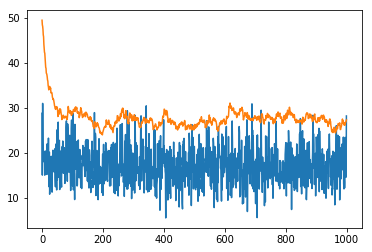

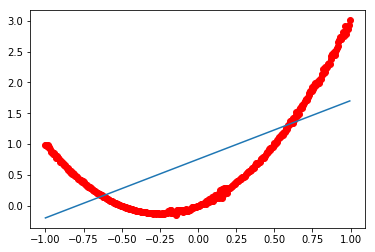

In [20]:
import random
import numpy as np
from matplotlib import pyplot as plt


fig1 = plt.figure(1)
ax = fig1.add_subplot(111)
fig2 = plt.figure(2)
bx = fig2.add_subplot(111)
#####################################################################
# 将图像移到坐标原点

# ax.spines['right'].set_color('none')   # 将图像右边的轴设为透明
# ax.spines['top'].set_color('none')     # 将图像上面的轴设为透明
# ax.xaxis.set_ticks_position('bottom')    # 将x轴刻度设在下面的坐标轴上
# ax.yaxis.set_ticks_position('left')         # 将y轴刻度设在左边的坐标轴上
# ax.spines['bottom'].set_position(('data', 0))   # 将两个坐标轴的位置设在数据点原点
# ax.spines['left'].set_position(('data', 0))
# # plt.xticks(np.arange(-6, 6))
# # plt.yticks(np.arange(-6, 6))
# plt.axis('equal')
######################################################################
# 超参数定义
e = 0.04       # 学习率
m = 16       # minibatch大小
n = 200       # 数据大小的一半
EPS = 0.0001   # 精度
c = 2         # 模型容量


def generate(n):
    # n: 数据大小的一半
    w = 2
    p = []  # point
    # point = [[]]
    for i in range(-n, n):
        y_temp = w * i * i / (n * n) + i / n
        if(i < 40 and i > -40):
            y_temp = y_temp + 0.8 * y_temp * random.random() - 0.4 * y_temp
        else:
            y_temp = y_temp + 0.06 * y_temp * random.random() - 0.03 * y_temp
        p.append([i / n, y_temp])
    return p


def draw_error(p):
    # p: 产生的数据
    x = []
    y = []
    for i in range(len(p)):
        x.append(p[i][0])
        y.append(p[i][1])
        # ax.plot(p[i][0], p[i][1], "ro")
    ax.plot(x, y)


def draw_fit(p, w, n, c):
    # p: 产生的数据
    x = []
    y = []
    for i in range(len(p)):
        bx.plot(p[i][0], p[i][1], "ro")

    for i in range(-n, n):
        x.append(i / n)
        t = [0 for x in range(c + 1)]
        y_sum = 0
        for j in range(c + 1):
            t[j] = w[j] * (i / n)**(c - j) + t[j]
            y_sum = y_sum + t[j]
        y.append(y_sum)
    bx.plot(x, y)


def gen_minibatch(p, m, n):
    # p: 产生的数据
    # m: minibatac大小
    # n: 数据大小的一半

    batch = []
    for i in range(m):
        j = random.randint(-0.9 * n, 0.9 * n)
        batch.append(p[j])
    return batch


def gen_testbatch(p, m, n):
    batch = []
    for i in range(-n, int(-0.9 * n)):
        batch.append(p[i])
    for i in range(int(0.9 * n), n):
        batch.append(p[i])
    return batch


def grad1(batch, w):
    # batc：数据集
    # w：参数向量
    # print(len(batch))
    # print(len(w))
    # print(batch[0][0])
    w0 = 0
    w1 = 0
    m = len(batch)
    for i in range(m):
        # batch是二维list，batch[i][0]是横坐标，batch[i][1]是y
        temp = w[0] * batch[i][0] + w[1] - batch[i][1]
        w1 = w1 + temp
        w0 = w0 + temp * batch[i][0]
        # print(batch[i])
        # print(temp)
        # print(w0, w1)
        # print("========")
    grad_w = [w0 / m, w1 / m]  # 梯度
    return grad_w


def grad2(batch, w):
    # batc：数据集
    # w：参数向量
    w0 = 0
    w1 = 0
    w2 = 0
    m = len(batch)
    for i in range(m):
        temp = w[0] * batch[i][0] ** 2 + w[1] * batch[i][0] + w[2] - batch[i][1]
        w2 = w2 + temp
        w1 = w1 + temp * batch[i][0]
        w0 = w0 + temp * (batch[i][0] ** 2)

    grad_w = [w0 / m, w1 / m, w2 / m]
    return grad_w


def grad3(batch, w):
    # batc：数据集
    # w：参数向量
    m = len(batch)
    grad_w = [0, 0, 0, 0, 0, 0]
    for i in range(m):
        t4 = batch[i][0]  # x的1次方
        t3 = t4 * t4  # x的2次方
        t2 = t3 * t4  # x的3次方
        t1 = t2 * t4  # x的4次方
        t0 = t1 * t4  # x的5次方
        temp = w[0] * t0 + w[1] * t1 + w[2] * t2 + w[3] * t3 + w[4] * t4 + w[5] - batch[i][1]

        grad_w[5] = grad_w[5] + temp
        grad_w[4] = grad_w[4] + temp * t4
        grad_w[3] = grad_w[3] + temp * t3
        grad_w[2] = grad_w[2] + temp * t2
        grad_w[1] = grad_w[1] + temp * t1
        grad_w[0] = grad_w[0] + temp * t0

    grad_w = [x / m for x in grad_w]
    return grad_w


#  更新梯度，e为更新间隔
def updata_w(e, w, grad_w):
    # print(w)
    for i in range(len(w)):
        w[i] = w[i] - e * grad_w[i]

    # print(w)
    return w


def eps1(batch, w):
    error = 0
    y = 0
    # temp = [0 for x in range(c + 1)]
    for i in range(len(batch)):
        y = w[0] * batch[i][0] + w[1]
        # for j in range(c + 1):
        #     # print(j)
        #     # print(i)
        #     temp[j] = w[j] * batch[i][0]**j

        #     y = y + temp[j]
        error = error + (y - batch[i][1])**2
    return error / len(batch)


def eps2(batch, w):
    error = 0
    y = 0
    # temp = [0 for x in range(c + 1)]
    for i in range(len(batch)):
        y = w[0] * batch[i][0]**2 + w[1] * batch[i][0] + w[2]
        # for j in range(c + 1):
        #     # print(j)
        #     # print(i)
        #     temp[j] = w[j] * batch[i][0]**j

        #     y = y + temp[j]
        error = error + (y - batch[i][1])**2
    return error / len(batch)


def eps3(batch, w):
    error = 0
    y = 0
    # temp = [0 for x in range(c + 1)]
    for i in range(len(batch)):
        y = w[0] * batch[i][0]**5 + w[1] * batch[i][0]**4 + \
            w[2] * batch[i][0]**3 + w[3] * batch[i][0]**2 + \
            w[4] * batch[i][0]**1 + w[5]
        error = error + (y - batch[i][1])**2
    return error / len(batch)          


def eps(batch, w, c):
    error = 0
    y = 0
    for i in range(len(batch)):
        temp = [0 for i in range(c + 1)]
        for j in range(c + 1):
            print("j:{}".format(j))
            print("i:{}".format(i))
            temp[j] = w[j] * batch[i][0]**(c - j)
            y = y + temp[j]
        error = error + (y - batch[i][1])**2
    return error / len(batch)

# 产生数据
p = generate(n)
testbatch = gen_testbatch(p, m, n)
train_pic = []
test_pic = []


# 用线性拟合

# 定义参数初值
w = [1, 1]

for i in range(1000):
    # 产生minibatach
    minibatch = gen_minibatch(p, m, n)
    train_error = eps1(minibatch, w)
    test_error = eps1(testbatch, w)
    train_pic.append([i, 50 * train_error])
    test_pic.append([i, 50 * test_error])
    if(train_error < EPS):
        break
    # 求梯度
    grad_w = grad1(minibatch, w)
    # print(grad_w)
    # 更新梯度
    w = updata_w(e, w, grad_w)


# 用二次函数
# 定义参数初值
# w = [0.5, 0.5, 0.5]

# for i in range(1000):
#     # 产生minibatach
#     minibatch = gen_minibatch(p, m, n)
#     train_error = eps2(minibatch, w)
#     test_error = eps2(testbatch, w)
#     train_pic.append([i, 50 * train_error])
#     test_pic.append([i, 50 * test_error])
#     # print(error)
#     if(train_error < EPS):
#         break
#     # 求梯度
#     grad_w = grad2(minibatch, w)
#     # print(grad_w)
#     # 更新梯度
#     w = updata_w(e, w, grad_w)


# 用五次函数
# 定义参数初值
# w = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

# for i in range(1000):
#     # 产生minibatach
#     minibatch = gen_minibatch(p, m, n)
#     train_error = eps3(minibatch, w)
#     test_error = eps3(testbatch, w)
#     train_pic.append([i, 50 * train_error])
#     test_pic.append([i, 50 * test_error])
#     # print(error)
#     if(train_error < EPS):
#         break
#     # 求梯度
#     grad_w = grad3(minibatch, w)
#     # print(grad_w)
#     # 更新梯度
#     w = updata_w(e, w, grad_w)

# 输出最终拟合的w，从左到右降次排列
print(w)
# 画训练次数和误差大小关系图
draw_error(train_pic)
draw_error(test_pic)
# plt.show()
# 画拟合曲线

draw_fit(p, w, n, 1)

plt.show()


[1.991802382037489, 1.0012421292618696, -0.0011698498001114074]


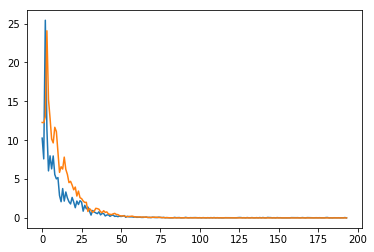

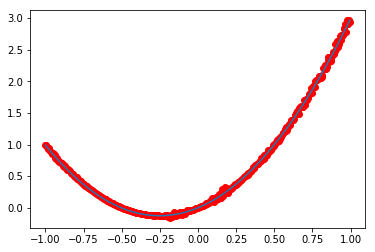

In [24]:
import random
import numpy as np
from matplotlib import pyplot as plt


fig1 = plt.figure(1)
ax = fig1.add_subplot(111)
fig2 = plt.figure(2)
bx = fig2.add_subplot(111)
#####################################################################
# 将图像移到坐标原点

# ax.spines['right'].set_color('none')   # 将图像右边的轴设为透明
# ax.spines['top'].set_color('none')     # 将图像上面的轴设为透明
# ax.xaxis.set_ticks_position('bottom')    # 将x轴刻度设在下面的坐标轴上
# ax.yaxis.set_ticks_position('left')         # 将y轴刻度设在左边的坐标轴上
# ax.spines['bottom'].set_position(('data', 0))   # 将两个坐标轴的位置设在数据点原点
# ax.spines['left'].set_position(('data', 0))
# # plt.xticks(np.arange(-6, 6))
# # plt.yticks(np.arange(-6, 6))
# plt.axis('equal')
######################################################################
# 超参数定义
e = 0.5       # 学习率
m = 16         # minibatch大小
n = 200       # 数据大小的一半
EPS = 0.0001   # 精度
c = 2         # 模型容量


# 产生数据集
def generate(n):
    # n: 数据大小的一半
    w = 2
    p = []  # point
    # point = [[]]
    for i in range(-n, n):
        y_temp = w * i * i / (n * n) + i / n
        if(i < 40 and i > -40):
            y_temp = y_temp + 0.8 * y_temp * random.random() - 0.4 * y_temp
        else:
            y_temp = y_temp + 0.06 * y_temp * random.random() - 0.03 * y_temp
        p.append([i / n, y_temp])
    return p


# 绘制误差与训练次数曲线
def draw_error(p):
    # p: 产生的数据
    x = []
    y = []
    for i in range(len(p)):
        x.append(p[i][0])
        y.append(p[i][1])
        # ax.plot(p[i][0], p[i][1], "ro")
    ax.plot(x, y)

# 绘制拟合曲线
def draw_fit(p, w, n, c):
    # p: 产生的数据
    x = []
    y = []
    for i in range(len(p)):
        bx.plot(p[i][0], p[i][1], "ro")

    for i in range(-n, n):
        x.append(i / n)
        t = [0 for x in range(c + 1)]
        y_sum = 0
        for j in range(c + 1):
            t[j] = w[j] * (i / n)**(c - j) + t[j]
            y_sum = y_sum + t[j]
        y.append(y_sum)
    bx.plot(x, y)

# 产生minibatch
def gen_minibatch(p, m, n):
    # p: 产生的数据
    # m: minibatac大小
    # n: 数据大小的一半

    batch = []
    for i in range(m):
        j = random.randint(-0.9 * n, 0.9 * n)
        batch.append(p[j])
    return batch

# 产生测试数据
def gen_testbatch(p, m, n):
    batch = []
    for i in range(-n, int(-0.9 * n)):
        batch.append(p[i])
    for i in range(int(0.9 * n), n):
        batch.append(p[i])
    return batch

# 求得一次梯度，并返回梯度，但是不更新w

# def grad(batch, w, c):
#     grad_w = []
#     for j in range(len(batch)):
#         #   求J = 1/m*sum((y-yt)*x(i))
#         #   先求y，再减yt，
#         y = 0
#         for i in range(c + 1):
#             y = y + w[i] * batch[j][0]**i
#         y = y - batch[j][1]


# 求一次函数梯度
def grad1(batch, w):
    # batc：数据集
    # w：参数向量
    # print(len(batch))
    # print(len(w))
    # print(batch[0][0])
    w0 = 0
    w1 = 0
    m = len(batch)
    for i in range(m):
        # batch是二维list，batch[i][0]是横坐标，batch[i][1]是y
        temp = w[0] * batch[i][0] + w[1] - batch[i][1]
        w1 = w1 + temp
        w0 = w0 + temp * batch[i][0]
        # print(batch[i])
        # print(temp)
        # print(w0, w1)
        # print("========")
    grad_w = [w0 / m, w1 / m]  # 梯度
    return grad_w

# 求二次函数梯度
def grad2(batch, w):
    # batc：数据集
    # w：参数向量
    w0 = 0
    w1 = 0
    w2 = 0
    m = len(batch)
    for i in range(m):
        temp = w[0] * batch[i][0] ** 2 + w[1] * batch[i][0] + w[2] - batch[i][1]
        w2 = w2 + temp
        w1 = w1 + temp * batch[i][0]
        w0 = w0 + temp * (batch[i][0] ** 2)

    grad_w = [w0 / m, w1 / m, w2 / m]
    return grad_w

# 求五次函数梯度
def grad3(batch, w):
    # batc：数据集
    # w：参数向量
    m = len(batch)
    grad_w = [0, 0, 0, 0, 0, 0]
    for i in range(m):
        t4 = batch[i][0]  # x的1次方
        t3 = t4 * t4  # x的2次方
        t2 = t3 * t4  # x的3次方
        t1 = t2 * t4  # x的4次方
        t0 = t1 * t4  # x的5次方
        temp = w[0] * t0 + w[1] * t1 + w[2] * t2 + w[3] * t3 + w[4] * t4 + w[5] - batch[i][1]

        grad_w[5] = grad_w[5] + temp
        grad_w[4] = grad_w[4] + temp * t4
        grad_w[3] = grad_w[3] + temp * t3
        grad_w[2] = grad_w[2] + temp * t2
        grad_w[1] = grad_w[1] + temp * t1
        grad_w[0] = grad_w[0] + temp * t0

    grad_w = [x / m for x in grad_w]
    return grad_w


#  更新梯度，e为更新间隔
def updata_w(e, w, grad_w):
    # print(w)
    for i in range(len(w)):
        w[i] = w[i] - e * grad_w[i]

    # print(w)
    return w

# 求一次函数损失函数值
def eps1(batch, w):
    error = 0
    y = 0
    # temp = [0 for x in range(c + 1)]
    for i in range(len(batch)):
        y = w[0] * batch[i][0] + w[1]
        # for j in range(c + 1):
        #     # print(j)
        #     # print(i)
        #     temp[j] = w[j] * batch[i][0]**j

        #     y = y + temp[j]
        error = error + (y - batch[i][1])**2
    return error / len(batch)

# 求二次函数损失函数值
def eps2(batch, w):
    error = 0
    y = 0
    # temp = [0 for x in range(c + 1)]
    for i in range(len(batch)):
        y = w[0] * batch[i][0]**2 + w[1] * batch[i][0] + w[2]
        # for j in range(c + 1):
        #     # print(j)
        #     # print(i)
        #     temp[j] = w[j] * batch[i][0]**j

        #     y = y + temp[j]
        error = error + (y - batch[i][1])**2
    return error / len(batch)

# 求五次函数损失函数值
def eps3(batch, w):
    error = 0
    y = 0
    # temp = [0 for x in range(c + 1)]
    for i in range(len(batch)):
        y = w[0] * batch[i][0]**5 + w[1] * batch[i][0]**4 + \
            w[2] * batch[i][0]**3 + w[3] * batch[i][0]**2 + \
            w[4] * batch[i][0]**1 + w[5]
        error = error + (y - batch[i][1])**2
    return error / len(batch)          


# def eps(batch, w, c):
#     error = 0
#     y = 0
#     for i in range(len(batch)):
#         temp = [0 for i in range(c + 1)]
#         for j in range(c + 1):
#             print("j:{}".format(j))
#             print("i:{}".format(i))
#             temp[j] = w[j] * batch[i][0]**(c - j)
#             y = y + temp[j]
#         error = error + (y - batch[i][1])**2
#     return error / len(batch)

# 产生数据
p = generate(n)
testbatch = gen_testbatch(p, m, n)
train_pic = []
test_pic = []

# 用二次函数
# 定义参数初值
w = [0.5, 0.5, 0.5]

for i in range(1000):
    # 产生minibatach
    minibatch = gen_minibatch(p, m, n)
    train_error = eps2(minibatch, w)
    test_error = eps2(testbatch, w)
    train_pic.append([i, 50 * train_error])
    test_pic.append([i, 50 * test_error])
    # print(error)
    if(train_error < EPS):
        break
    # 求梯度
    grad_w = grad2(minibatch, w)
    # print(grad_w)
    # 更新梯度
    w = updata_w(e, w, grad_w)


# 用五次函数
# 定义参数初值
# w = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

# for i in range(1000):
#     # 产生minibatach
#     minibatch = gen_minibatch(p, m, n)
#     train_error = eps3(minibatch, w)
#     test_error = eps3(testbatch, w)
#     train_pic.append([i, 50 * train_error])
#     test_pic.append([i, 50 * test_error])
#     # print(error)
#     if(train_error < EPS):
#         break
#     # 求梯度
#     grad_w = grad3(minibatch, w)
#     # print(grad_w)
#     # 更新梯度
#     w = updata_w(e, w, grad_w)

# 输出最终拟合的w，从左到右降次排列
print(w)
# 画训练次数和误差大小关系图
draw_error(train_pic)
draw_error(test_pic)
# plt.show()
# 画拟合曲线

draw_fit(p, w, n, 2)

plt.show()


[-0.09591713115584753, 0.7328889910891971, 0.11733801564192735, 1.1765286709449332, 0.9670877003291132, 0.19225236792703332]


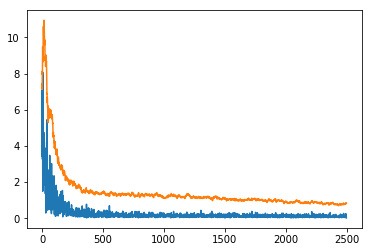

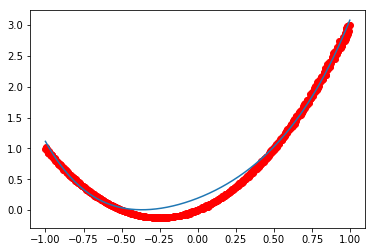

In [15]:
import random
import numpy as np
from matplotlib import pyplot as plt


fig1 = plt.figure(1)
ax = fig1.add_subplot(111)
fig2 = plt.figure(2)
bx = fig2.add_subplot(111)
#####################################################################
# 将图像移到坐标原点

# ax.spines['right'].set_color('none')   # 将图像右边的轴设为透明
# ax.spines['top'].set_color('none')     # 将图像上面的轴设为透明
# ax.xaxis.set_ticks_position('bottom')    # 将x轴刻度设在下面的坐标轴上
# ax.yaxis.set_ticks_position('left')         # 将y轴刻度设在左边的坐标轴上
# ax.spines['bottom'].set_position(('data', 0))   # 将两个坐标轴的位置设在数据点原点
# ax.spines['left'].set_position(('data', 0))
# # plt.xticks(np.arange(-6, 6))
# # plt.yticks(np.arange(-6, 6))
# plt.axis('equal')
######################################################################
# 超参数定义
e = 0.1       # 学习率
m = 8       # minibatch大小
n = 500       # 数据大小的一半
EPS = 0.0001   # 精度
c = 2         # 模型容量


def generate(n):
    # n: 数据大小的一半
    w = 2
    p = []  # point
    # point = [[]]
    for i in range(-n, n):
        y_temp = w * i * i / (n * n) + i / n
        if(i < 40 and i > -40):
            y_temp = y_temp + 0.8 * y_temp * random.random() - 0.4 * y_temp
        else:
            y_temp = y_temp + 0.06 * y_temp * random.random() - 0.03 * y_temp
        p.append([i / n, y_temp])
    return p


def draw_error(p):
    # p: 产生的数据
    x = []
    y = []
    for i in range(len(p)):
        x.append(p[i][0])
        y.append(p[i][1])
        # ax.plot(p[i][0], p[i][1], "ro")
    ax.plot(x, y)


def draw_fit(p, w, n, c):
    # p: 产生的数据
    x = []
    y = []
    for i in range(len(p)):
        bx.plot(p[i][0], p[i][1], "ro")

    for i in range(-n, n):
        x.append(i / n)
        t = [0 for x in range(c + 1)]
        y_sum = 0
        for j in range(c + 1):
            t[j] = w[j] * (i / n)**(c - j) + t[j]
            y_sum = y_sum + t[j]
        y.append(y_sum)
    bx.plot(x, y)


def gen_minibatch(p, m, n):
    # p: 产生的数据
    # m: minibatac大小
    # n: 数据大小的一半
    batch = []
    for i in range(m):
        j = random.randint(-0.6 * n, 0.6 * n)
        batch.append(p[j])
    return batch


def gen_testbatch(p, m, n):
    batch = []
    for i in range(-n, int(-0.4 * n)):
        batch.append(p[i])
    for i in range(int(0.4 * n), n):
        batch.append(p[i])
    
    return batch

# 求得一次梯度，并返回梯度，但是不更新w

# def grad(batch, w, c):
#     grad_w = []
#     for j in range(len(batch)):
#         #   求J = 1/m*sum((y-yt)*x(i))
#         #   先求y，再减yt，
#         y = 0
#         for i in range(c + 1):
#             y = y + w[i] * batch[j][0]**i
#         y = y - batch[j][1]


def grad1(batch, w):
    # batc：数据集
    # w：参数向量
    # print(len(batch))
    # print(len(w))
    # print(batch[0][0])
    w0 = 0
    w1 = 0
    m = len(batch)
    for i in range(m):
        # batch是二维list，batch[i][0]是横坐标，batch[i][1]是y
        temp = w[0] * batch[i][0] + w[1] - batch[i][1]
        w1 = w1 + temp
        w0 = w0 + temp * batch[i][0]
        # print(batch[i])
        # print(temp)
        # print(w0, w1)
        # print("========")
    grad_w = [w0 / m, w1 / m]  # 梯度
    return grad_w


def grad2(batch, w):
    # batc：数据集
    # w：参数向量
    w0 = 0
    w1 = 0
    w2 = 0
    m = len(batch)
    for i in range(m):
        temp = w[0] * batch[i][0] ** 2 + w[1] * batch[i][0] + w[2] - batch[i][1]
        w2 = w2 + temp
        w1 = w1 + temp * batch[i][0]
        w0 = w0 + temp * (batch[i][0] ** 2)

    grad_w = [w0 / m, w1 / m, w2 / m]
    return grad_w


def grad3(batch, w):
    # batc：数据集
    # w：参数向量
    m = len(batch)
    grad_w = [0, 0, 0, 0, 0, 0]
    for i in range(m):
        t4 = batch[i][0]  # x的1次方
        t3 = t4 * t4  # x的2次方
        t2 = t3 * t4  # x的3次方
        t1 = t2 * t4  # x的4次方
        t0 = t1 * t4  # x的5次方
        temp = w[0] * t0 + w[1] * t1 + w[2] * t2 + w[3] * t3 + w[4] * t4 + w[5] - batch[i][1]

        grad_w[5] = grad_w[5] + temp
        grad_w[4] = grad_w[4] + temp * t4
        grad_w[3] = grad_w[3] + temp * t3
        grad_w[2] = grad_w[2] + temp * t2
        grad_w[1] = grad_w[1] + temp * t1
        grad_w[0] = grad_w[0] + temp * t0

    grad_w = [x / m for x in grad_w]
    return grad_w


#  更新梯度，e为更新间隔
def updata_w(e, w, grad_w):
    # print(w)
    for i in range(len(w)):
        w[i] = w[i] - e * grad_w[i]

    # print(w)
    return w


def eps1(batch, w):
    error = 0
    y = 0
    # temp = [0 for x in range(c + 1)]
    for i in range(len(batch)):
        y = w[0] * batch[i][0] + w[1]
        # for j in range(c + 1):
        #     # print(j)
        #     # print(i)
        #     temp[j] = w[j] * batch[i][0]**j

        #     y = y + temp[j]
        error = error + (y - batch[i][1])**2
    return error / len(batch)


def eps2(batch, w):
    error = 0
    y = 0
    # temp = [0 for x in range(c + 1)]
    for i in range(len(batch)):
        y = w[0] * batch[i][0]**2 + w[1] * batch[i][0] + w[2]
        # for j in range(c + 1):
        #     # print(j)
        #     # print(i)
        #     temp[j] = w[j] * batch[i][0]**j

        #     y = y + temp[j]
        error = error + (y - batch[i][1])**2
    return error / len(batch)


def eps3(batch, w):
    error = 0
    y = 0
    # temp = [0 for x in range(c + 1)]
    for i in range(len(batch)):
        y = w[0] * batch[i][0]**5 + w[1] * batch[i][0]**4 + \
            w[2] * batch[i][0]**3 + w[3] * batch[i][0]**2 + \
            w[4] * batch[i][0]**1 + w[5]
        error = error + (y - batch[i][1])**2
    return error / len(batch)          

# def test_eps2(testbatch, w):
#     error = 0
#     y = 0
#     # temp = [0 for x in range(c + 1)]
#     for i in range(len(testbatch)):
#         y = w[0] * testbatch[i][0]**2 + w[1] * testbatch[i][0] + w[2]
#         # for j in range(c + 1):
#         #     # print(j)
#         #     # print(i)
#         #     temp[j] = w[j] * batch[i][0]**j

#         #     y = y + temp[j]
#         error = error + (y - testbatch[i][1])**2
#     return error / len(testbatch)


def eps(batch, w, c):
    error = 0
    y = 0
    for i in range(len(batch)):
        temp = [0 for i in range(c + 1)]
        for j in range(c + 1):
            print("j:{}".format(j))
            print("i:{}".format(i))
            temp[j] = w[j] * batch[i][0]**(c - j)
            y = y + temp[j]
        error = error + (y - batch[i][1])**2
    return error / len(batch)

# 产生数据
p = generate(n)
testbatch = gen_testbatch(p, m, n)
train_pic = []
test_pic = []
# w = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
# # print(p)
# # 产生minibatach
# # minibatch = gen_minibatch(p, m, n)
# draw(p)
# plt.show()
# # # print(minibatch)
# for i in range(1000):
#     grad_w = grad3(p, w)
#     w = updata_w(e, w, grad_w)
# print(minibatch)
# draw(minibatch)

# 用线性拟合

# 定义参数初值
# w = [0.1, 0.1]

# for i in range(1000):
#     # 产生minibatach
#     minibatch = gen_minibatch(p, m, n)
#     train_error = eps1(minibatch, w)
#     test_error = eps1(testbatch, w)
#     train_pic.append([i, 50 * train_error])
#     test_pic.append([i, 50 * test_error])
#     if(train_error < EPS):
#         break
#     # 求梯度
#     grad_w = grad1(minibatch, w)
#     # print(grad_w)
#     # 更新梯度
#     w = updata_w(e, w, grad_w)


# 用二次函数
# 定义参数初值
# w = [0.5, 0.5, 0.5]

# for i in range(1000):
#     # 产生minibatach
#     minibatch = gen_minibatch(p, m, n)
#     train_error = eps2(minibatch, w)
#     test_error = eps2(testbatch, w)
#     train_pic.append([i, 50 * train_error])
#     test_pic.append([i, 50 * test_error])
#     # print(error)
#     if(train_error < EPS):
#         break
#     # 求梯度
#     grad_w = grad2(minibatch, w)
#     # print(grad_w)
#     # 更新梯度
#     w = updata_w(e, w, grad_w)


# 用五次函数
# 定义参数初值
w = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

for i in range(2500):
    # 产生minibatach
    minibatch = gen_minibatch(p, m, n)
    train_error = eps3(minibatch, w)
    test_error = eps3(testbatch, w)
    train_pic.append([i, 50 * train_error])
    test_pic.append([i, 50 * test_error])
    # print(error)
    if(train_error < EPS):
        break
    # 求梯度
    grad_w = grad3(minibatch, w)
    # print(grad_w)
    # 更新梯度
    w = updata_w(e, w, grad_w)

# 输出最终拟合的w，从左到右降次排列
print(w)
# 画训练次数和误差大小关系图

draw_error(train_pic)
draw_error(test_pic)
# plt.show()
# 画拟合曲线

draw_fit(p, w, n, 5)

plt.show()
